In [47]:
import pandas as pd

In [48]:
import io

def read_object_csv(response)-> pd.DataFrame:
    csv_content = response.read()
    df = pd.read_csv(io.BytesIO(csv_content), sep=';')
    return df

In [49]:
from minio import Minio
from os import getenv
from rich import print

client = Minio(
            'localhost:9000',
            access_key=getenv('MINIO_ROOT_USER'),
            secret_key=getenv('MINIO_ROOT_PASSWORD'),
            secure=False
        )

response = client.get_object('silver', 'oil-derivative-fuels/2016/11/part-0001.csv')
        
df = read_object_csv(response)
df.head()

,index,year_month,uf,product,unit,volume,created_at,year,month
0,4164,2016-11-01,Ceará,Etanol Hidratado,m3,9970.50,2023-10-29 23:41:06.623452-03:00,2016,11
1,4173,2016-11-01,Piauí,Etanol Hidratado,m3,2718.00,2023-10-29 23:41:06.623452-03:00,2016,11
2,4255,2016-11-01,Tocantins,Etanol Hidratado,m3,1678.20,2023-10-29 23:41:06.623452-03:00,2016,11
3,4279,2016-11-01,Paraíba,Etanol Hidratado,m3,5933.69,2023-10-29 23:41:06.623452-03:00,2016,11
4,4293,2016-11-01,Maranhão,Etanol Hidratado,m3,2214.25,2023-10-29 23:41:06.623452-03:00,2016,11


In [50]:
def format_number(x):
    number = '{:,.0f}'.format(x)
    return str(number.replace(',','.'))

In [51]:
result = df.groupby('year')['volume'].sum().reset_index()
result['volume'] = result['volume'].apply(format_number)
result

,year,volume
0,2016,10.982.919


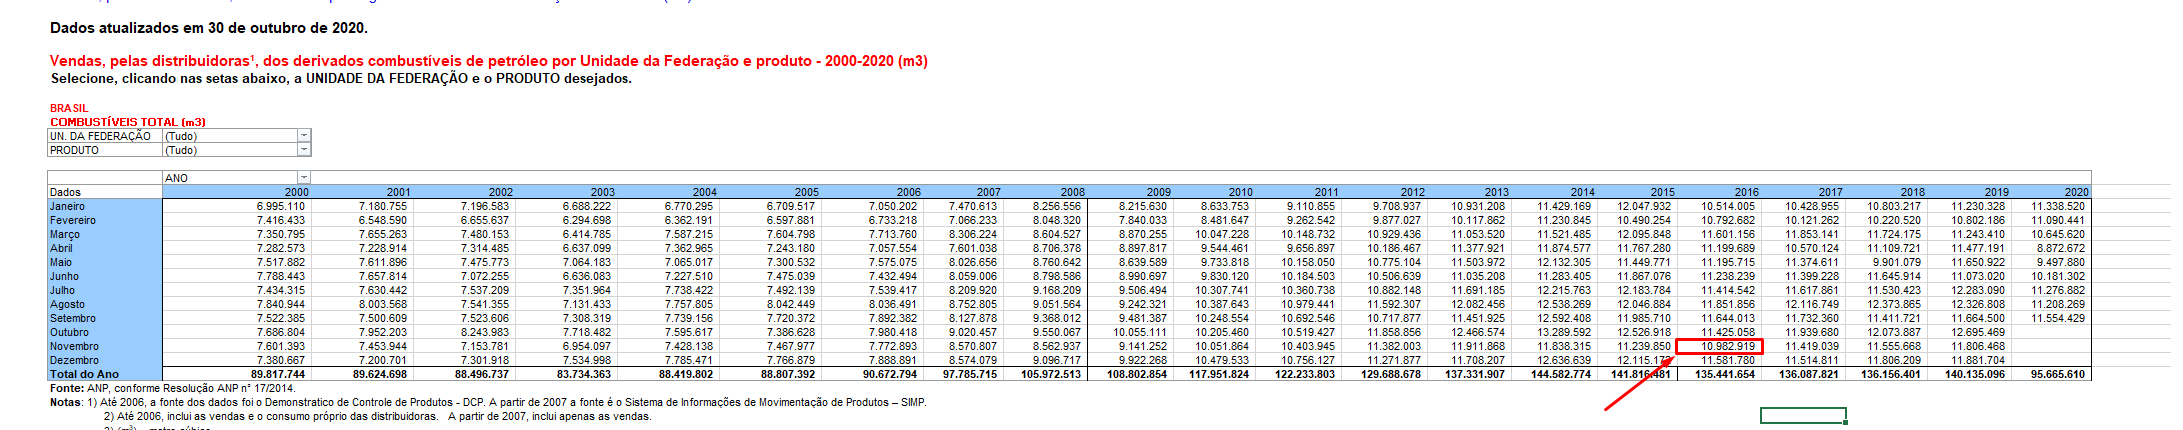